In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
data = pd.read_csv('data/advertising.csv')
print(data.head())
print(data.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

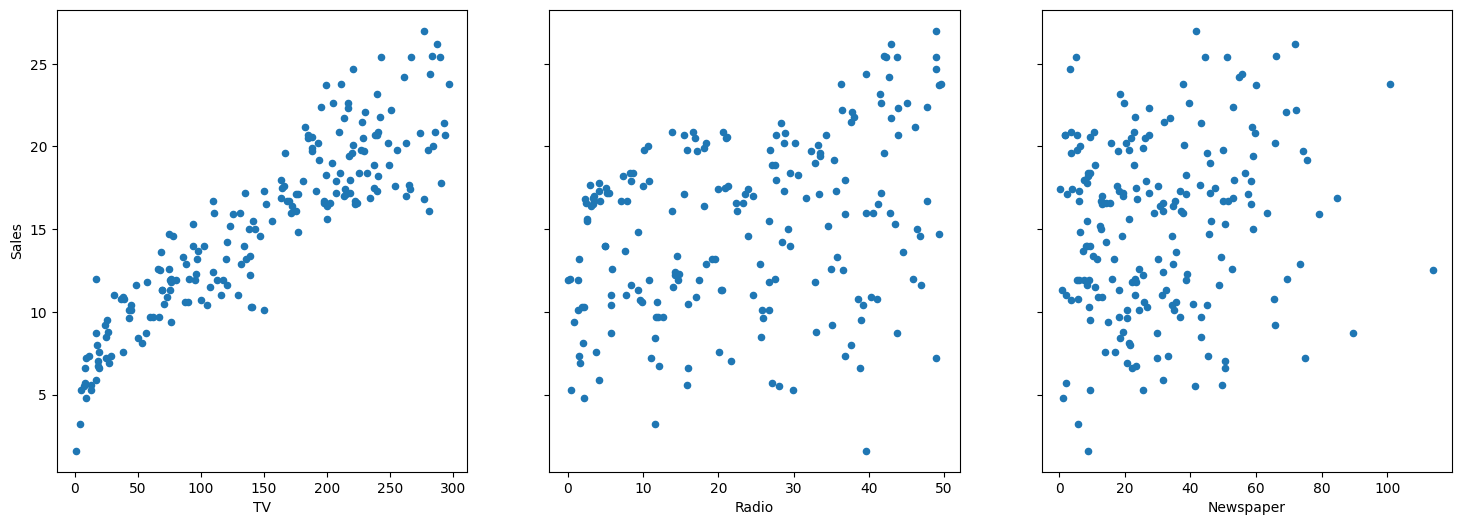

In [3]:
fig,(tv,radio,newspaper) = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=tv,figsize=(18,6))
data.plot(kind='scatter',x='Radio',y='Sales',ax=radio)
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=newspaper)

In [4]:
xTrain = data[['TV','Radio','Newspaper']]
yTrain = data['Sales']

In [5]:
def predict(x,w,b):
    return np.dot(x,w)+b

In [6]:
def computeCost(x,y,w,b):
    m = x.shape[0]
    return (1/2*m)*np.sum((predict(x,w,b)-y)**2)

In [14]:
def computeGradient(x,y,w,b):
    m = x.shape[0]
    dw=(1/m)*np.dot(x.T,(predict(x,w,b)-y))
    db=(1/m)*np.sum(predict(x,w,b)-y)
    return dw,db

In [70]:
def gradientDescent(x,y,w_in,b_in,costFunction,gradientFunction,alpha,iterations):
    Jhistory = []
    w = w_in
    b = b_in
    for i in range(iterations):
        dw,db = gradientFunction(x,y,w,b)
        w,b = w-alpha*dw,b-alpha*db
        if i<10000:
            Jhistory.append(costFunction(x,y,w,b))
        if i%100==0:
            print('Iteration %d | Cost: %f' %(i,costFunction(x,y,w,b)))
    return w,b,Jhistory

In [78]:
initial_w = np.zeros(xTrain.shape[1])
initial_b = 0
alpha =1e-6
iterations = 1001
w_final,b_final,Jhistory = gradientDescent(xTrain,yTrain,initial_w,initial_b,computeCost,computeGradient,alpha,iterations)
print('\nw_final: ',w_final)
print('b_final: ',b_final)

Iteration 0 | Cost: 4846627.178428
Iteration 100 | Cost: 283631.164990
Iteration 200 | Cost: 256735.136867
Iteration 300 | Cost: 242055.733668
Iteration 400 | Cost: 229330.769104
Iteration 500 | Cost: 218262.679338
Iteration 600 | Cost: 208615.894714
Iteration 700 | Cost: 200189.201306
Iteration 800 | Cost: 192810.663841
Iteration 900 | Cost: 186333.334741
Iteration 1000 | Cost: 180631.593248

w_final:  [0.07776004 0.05183312 0.04470577]
b_final:  0.001754120816050615


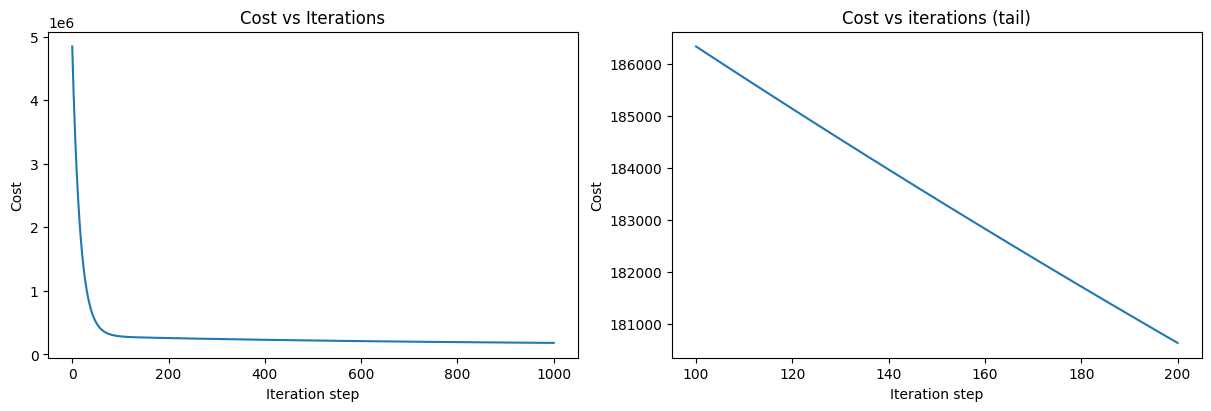

In [79]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,4),constrained_layout=True)
ax1.plot(Jhistory)
ax2.plot(100+np.arange(len(Jhistory[900:])),Jhistory[900:])
ax1.set_title('Cost vs Iterations'); ax2.set_title('Cost vs iterations (tail)')
ax1.set_ylabel('Cost'); ax1.set_xlabel('Iteration step')
ax2.set_ylabel('Cost'); ax2.set_xlabel('Iteration step')
plt.show()